<h1 align=center><font size = 5>Multiple Linear Regression  </font></h1> 

In [1]:
from torch import nn,optim
import torch
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader

In [2]:
torch.manual_seed(1)

In [3]:
def Plot_2D_Plane(model,dataset,n=0):
    from mpl_toolkits.mplot3d import Axes3D
    w1=model.state_dict()['linear.weight'].numpy()[0][0]
    w2=model.state_dict()['linear.weight'].numpy()[0][0]
    b=model.state_dict()['linear.bias'].numpy()

    #data
    x1 =data_set.x[:,0].view(-1,1).numpy()
    x2 = data_set.x[:,1].view(-1,1).numpy()
    y = data_set.y.numpy()

    #make plane
    X, Y = np.meshgrid(np.arange(x1.min(), x1.max(), 0.05), np.arange(x2.min(), x2.max(), 0.05))
    yhat = w1*X+w2*Y+b

    #plotting
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.plot(x1[:,0],x2[:,0],y[:,0],'ro',label='y') #scatter plot
    
    ax.plot_surface(X,Y,yhat) #plane plot
    
    ax.set_xlabel('x1 ')
    ax.set_ylabel('x2 ')
    ax.set_zlabel('y')
    #ax.set_ylim((y.min()-3, y.max()+3))
    plt.title('estimated plane iteration:'+str(n))
    ax.legend()

    plt.show()

In [4]:
from torch.utils.data import Dataset, DataLoader
class Data2D(Dataset):
    def __init__(self):
            self.x=torch.zeros(20,2)
            self.x[:,0]=torch.arange(-1,1,0.1)
            self.x[:,1]=torch.arange(-1,1,0.1)
            self.w=torch.tensor([ [1.0],[1.0]])
            self.b=1
            self.f=torch.mm(self.x,self.w)+self.b
            
            self.y=self.f+0.1*torch.randn((self.x.shape[0],1))
            self.len=self.x.shape[0]

    def __getitem__(self,index):          
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len

In [9]:
data_set=Data2D()

<a id="ref1"></a>
<h2 align=center>Create the Model, Optimizer, and Total Loss Function (cost)</h2>

In [10]:
class linear_regression(nn.Module):
    def __init__(self,input_size,output_size):
        super(linear_regression,self).__init__()
        self.linear=nn.Linear(input_size,output_size)
    def forward(self,x):
        yhat=self.linear(x)
        return yhat

In [11]:
model=linear_regression(2,1)

In [12]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.3454, 0.0403]], requires_grad=True), Parameter containing:
tensor([0.2322], requires_grad=True)]


<img src = "https://ibm.box.com/shared/static/f8hskuwrnctjg21agud69ddla0jkbef5.png" width = 100, align = "center">

In [13]:
optimizer = optim.SGD(model.parameters(), lr = 0.1)

In [14]:
criterion = nn.MSELoss()

In [15]:
train_loader=DataLoader(dataset=data_set,batch_size=2)

<a id="ref2"></a>
<h2 align=center>Train the Model via Mini-Batch Gradient Descent </h2>

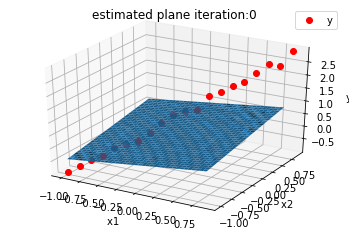

In [16]:
LOSS=[]
Plot_2D_Plane(model,data_set)   
epochs=100
   
    
for epoch in range(epochs):
    for x,y in train_loader:
        #make a prediction 
        yhat=model(x)
        #calculate the loss
        loss=criterion(yhat,y)
        #store loss/cost 
        LOSS.append(loss.item())
        #clear gradient 
        optimizer.zero_grad()
        #Backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        #the step function on an Optimizer makes an update to its parameters
        optimizer.step()
     


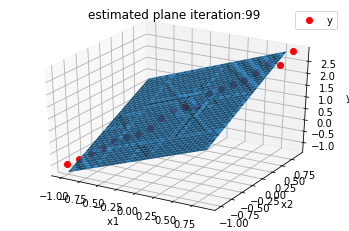

In [17]:
Plot_2D_Plane(model,data_set,epoch)

Text(0, 0.5, 'Cost/total loss ')

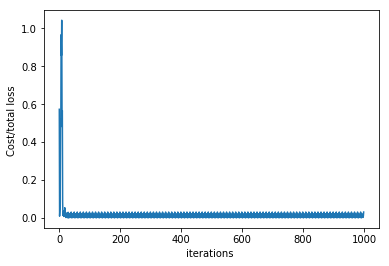

In [18]:
plt.plot(LOSS)
plt.xlabel("iterations ")
plt.ylabel("Cost/total loss ")

<a id="ref3"></a>
<h2>Practice Questions</h2>

Create a new model1. Train the model with a batch size of 30, store the loss or total cost in a list LOSS1, and plot the results.

Text(0, 0.5, 'Cost/total loss ')

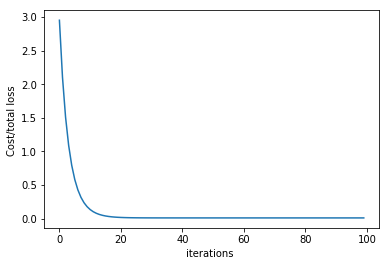

In [21]:
model1=linear_regression(2,1)
optimizer = optim.SGD(model1.parameters(), lr = 0.1)
train_loader=DataLoader(dataset=data_set,batch_size=30)
LOSS1 = []
epochs = 100
for epoch in range(epochs):
    for x,y in train_loader:
        #make a prediction 
        yhat=model1(x)
        #calculate the loss
        loss=criterion(yhat,y)
        #store loss/cost 
        LOSS1.append(loss.item())
        #clear gradient 
        optimizer.zero_grad()
        #Backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        #the step function on an Optimizer makes an update to its parameters
        optimizer.step()
plt.plot(LOSS1)
plt.xlabel("iterations ")
plt.ylabel("Cost/total loss ")   

#### Use the following validation data to calculate the total loss or cost for both models:  

In [22]:
torch.manual_seed(2)

validation_data=Data2D()
Y=validation_data.y
X=validation_data.x

yhat1 = model(X)
yhat2 = model1(X)
loss1 = criterion(yhat1,Y)
loss2= criterion(yhat2,Y)
print(loss1)
print(loss2)

tensor(3.6634, grad_fn=<MseLossBackward>)
tensor(0.0078, grad_fn=<MseLossBackward>)
